In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amandiw","key":"fdc11736320a388e01ccfa55024784c7"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          12303        250  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           6428        105  1.0              
octopusteam/imdb-top-1000-tv-series                          IMDb Top 1000 TV Series                         23KB  2024-10-25 08:00:06           1136         26  1.0              
satvshr/top-4-used-car-sales-datasets-combined               Top 4 Used Car Sales Datasets Combined 

In [8]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:46<00:00, 169MB/s]
100% 9.51G/9.51G [01:46<00:00, 96.1MB/s]


In [9]:
!unzip aptos2019-blindness-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_images/4ca4c2b18a48.png  
  inflating: test_images/4d00167f2d05.png  
  inflating: test_images/4d32f2284293.png  
  inflating: test_images/4d6333d41069.png  
  inflating: test_images/4d64a0fe8b2b.png  
  inflating: test_images/4d80c835d862.png  
  inflating: test_images/4d8cb0caa08a.png  
  inflating: test_images/4d8e6a111b56.png  
  inflating: test_images/4db635ee7440.png  
  inflating: test_images/4db82094e4a4.png  
  inflating: test_images/4db841b2ab70.png  
  inflating: test_images/4dc102e8d716.png  
  inflating: test_images/4dcc7b517c26.png  
  inflating: test_images/4ddfe4a87b11.png  
  inflating: test_images/4def7bc721a9.png  
  inflating: test_images/4defa0f6e0aa.png  
  inflating: test_images/4df7349f0806.png  
  inflating: test_images/4e545daf0236.png  
  inflating: test_images/4e609a790d75.png  
  inflating: test_images/4e8b41486289.png  
  inflating: test_images/4ec759a78c5d.png  
  inflating: test_images/

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import os
import matplotlib.pyplot as plt

In [13]:
import os

# List files in the directory
image_folder = '/content/train_images'  # Update this path if necessary
print("First few images:", os.listdir(image_folder)[:5])  # Display first 5 images


First few images: ['28f98cfe3858.png', 'eb32a815f78c.png', '8f14bca04b47.png', '1632c4311fc9.png', '0c76fd494af6.png']


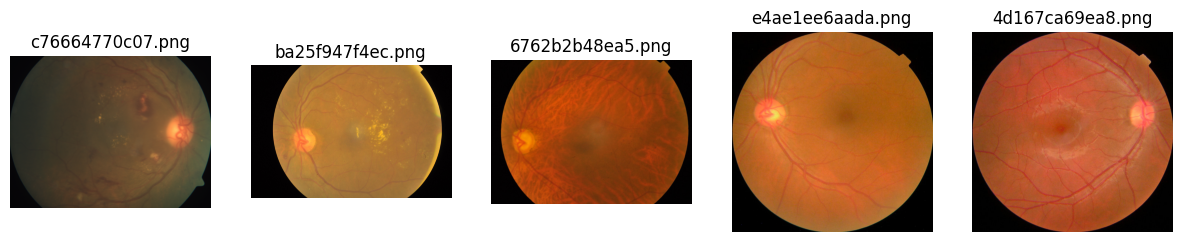

In [14]:
import matplotlib.pyplot as plt
import cv2
import random

# Load and display a few sample images
sample_images = random.sample(os.listdir(image_folder), 5)  # Select 5 random images

plt.figure(figsize=(15, 10))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.show()


In [15]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt

In [16]:
# Load the train.csv file
train_df = pd.read_csv('./train.csv')

# Append file extension for each image
train_df['id_code'] = train_df['id_code'].apply(lambda x: f"{x}.png")

# Define paths
train_images_path = './train_images'

# Map diagnosis to categorical labels
train_df['diagnosis'] = train_df['diagnosis'].astype(str)  # Convert to string for the data generator

In [17]:
# Set up the ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,                    # Normalize pixel values
    validation_split=0.2               # Split for validation
)

# Training generator
train_generator = data_gen.flow_from_dataframe(
    train_df,
    directory=train_images_path,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),            # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = data_gen.flow_from_dataframe(
    train_df,
    directory=train_images_path,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.


In [18]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for diagnosis
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs= 3  # Adjust as needed
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 761s 8s/step - accuracy: 0.6200 - loss: 1.0012 - val_accuracy: 0.7104 - val_loss: 0.8281
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 783s 8s/step - accuracy: 0.7122 - loss: 0.8294 - val_accuracy: 0.7049 - val_loss: 0.7610
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 745s 8s/step - accuracy: 0.7166 - loss: 0.7994 - val_accuracy: 0.7131 - val_loss: 0.8005


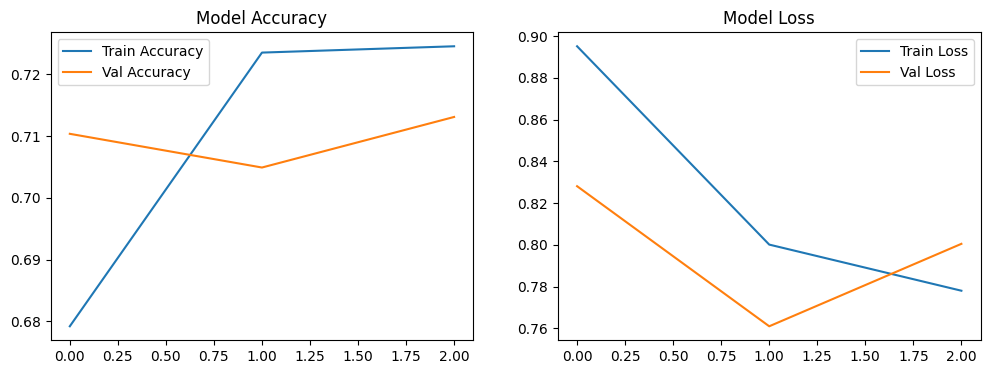

In [20]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [21]:
# Load test data
test_df = pd.read_csv('./test.csv')
test_df['id_code'] = test_df['id_code'].apply(lambda x: f"{x}.png")

# Test generator
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df,
    directory='./test_images',
    x_col='id_code',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Predict
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)

Found 1928 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step


In [22]:
# Print the final training and validation accuracies
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.2f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}")

Final Training Accuracy: 0.72
Final Validation Accuracy: 0.71


In [24]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy (as test accuracy proxy): {val_accuracy:.2f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.6961 - loss: 0.8233
Validation Accuracy (as test accuracy proxy): 0.71
